In [20]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt


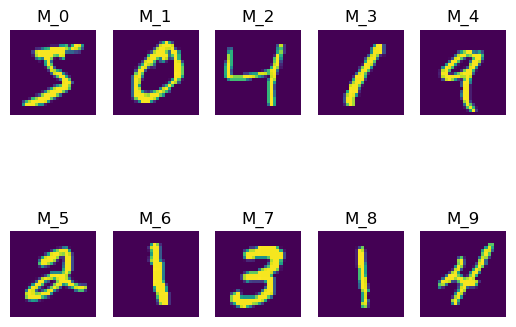

In [21]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap = None)
plt.show()

In [22]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /=255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [23]:
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='valu_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2632 - accuracy: 0.9196 - val_loss: 0.1062 - val_accuracy: 0.9680
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1086 - accuracy: 0.9669 - val_loss: 0.0854 - val_accuracy: 0.9742
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0771 - accuracy: 0.9769 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0606 - accuracy: 0.9809 - val_loss: 0.0876 - val_accuracy: 0.9772
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0725 - val_accuracy: 0.9822
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0716 - val_accuracy: 0.9845
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.0797 - val_accuracy: 0.9812
Epoch 

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.11899228394031525
test acc: 0.9840999841690063


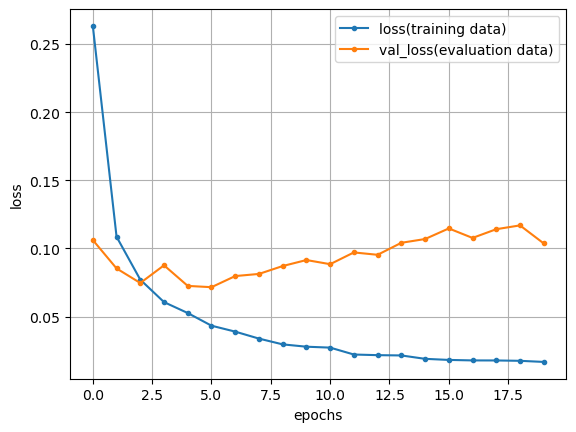

In [25]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()